# NUMERICAL SIMULATION LABORATORY- EXERCISE 9- LANZINI
## EXERCISE 09.1
### THE TRAVELLING SALESMAN PROBLEM

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**. The solution is obtained finding the path that minimizes the following loss/cost function:
​

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

Exercise 09.1 consists in finding the solution of a TSP with 34 cities with a genetic algorithm.(C++)

### Method

### First Path and Starting Population
First of all, I label each city with a number from 1 to 34. A single possible path is therefore a vector of 35 elements which represent the cities. The first and the 35th element must be the same, because the saleman has to return to the hometown. To reduce the degeneration of the shortest route to be 2, I set the first city to 1. For example, 2 possible paths are: 

$$
\left[ 1, 3, 5, 4, 5, ..., 34, 1 \right]
$$

or 
$$
\left[ 1, 27, 5, 16, 25, ..., 4, 1 \right]
$$

A population of n-paths is therefore a matrix (n x 35). From the simplest possible path($\left[ 1, 3, 5, 4, 5, ..., 34, 1 \right]$), I generate the starting population of 15 elements using the function random.shuffle() provided for vector class in c++. Before adding a new path to the population, I always check if It fulfils the bonds of the problem with a check function.

### Genetic Operators and Crossover Operator
To create new paths I create functions that corresponds to genetic-mutation operators and the crossover operator. In particular, the genetic-mutation functions are:

1. pair permutation of cities;
2. shift of $+n$ positions for $m$ contiguous cities;
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$);
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$).

Each of these function needs a single path (a 1D vector) as parameter and returns a new path(a new 1D vector) that can be added to the population.

Crossover function needs two different paths (two parents, two 1D vectors) as parameter and returns two new sons (two 1D vectors) that can be added to the population. This is the way the crossover function works:
given a selected mother and father,
1. cut their paths at the same position;
2. conserve the first part of the paths;
3. complete the paths with the missing cities adding them in the order in which they appear in the consort.

### "Order" and "Choose" Functions
Before using the genetic-mutation and crossover function in the algorithm, I add two more functions:

1. **Order**, which needs the population as parameter and returns the same population but ordered on a fitness basis.(The first path is the shortest of the population, the last one is the longest);

2. **Choose (Selection Operator)**, which only needs the current number **M** of paths  in the population as parameter. It returns a int number **j** between **0** to **M-1**. The **$j^{Th}$** path of the ordered population will be passed to the genetic- mutation functions (or as one of the parents to Crossover). To make the algorithm more efficient, the choose function is more likely to return little numbers. Therefore, best paths are more likely to be used to build new paths. **Choose** implementation was suggested by the professor: **$j= int(M \times r^p)+1$** where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. I find out $p = 5$ is a useful solution.

### Main -- Algorithm
I implement an algorithm to solve the TSP with all the functions I created before. Of course, this algorithm finds good solutions only if It's performed many times. At each iterations, one of the genetic-mutation operators or the crossover operator is called. With the 60% of probability, the algorithm calls Crossover, while each of the genetic-mutation operators has the 10% probability to be called. Therefore, for example if I ask the code to perform 1000 iterations, more or less 400 times It will call a genetic-mutation function.
In order not to slow down the code, I decide not to keep paths after the 200th position. So, when the number of paths in the population exceeds 200, the last elements are erased from the matrix.

## RESULTS

Exercise 09.1 asks to find the solution of TSP in two different cases:
1. 34 cities randomly placed **on** a circumference</span>
2. 34 cities randomly placed **inside** a square</span>

### 1. Circumference

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

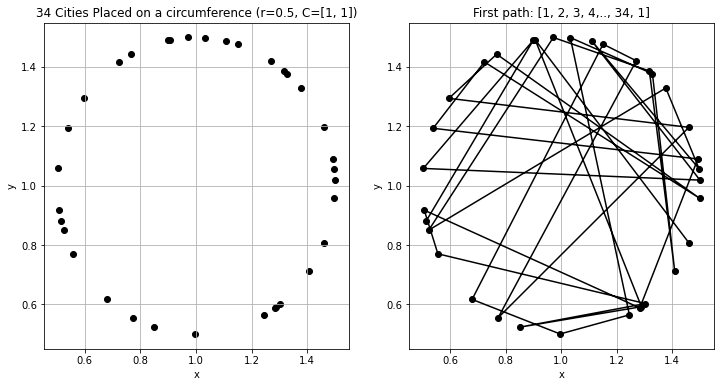

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

f1=open("circumferencex.txt", "r")
f1=open("circumferencey.txt", "r")

x_c = np.loadtxt("circumferencex.txt")
y_c = np.loadtxt("circumferencey.txt")
ax1.scatter(x_c, y_c, color='Black')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("34 Cities Placed on a circumference (r=0.5, C=[1, 1])")

ax2.plot(x_c, y_c, '-ok',color='Black')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("First path: [1, 2, 3, 4,.., 34, 1]")

ax2.grid(True)
ax1.grid(True)


Here the best path obtained after **50000** iterations of the algorithm. As expected, the path reminds to the circumference itself:

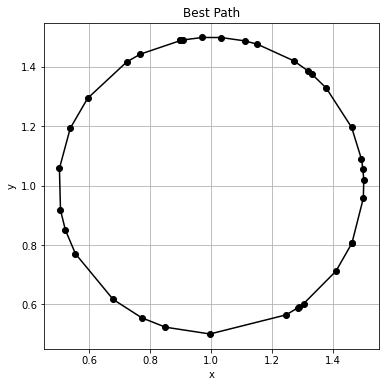

In [3]:
fig, (ax3) = plt.subplots(1, 1, figsize=(6, 6))
f3=open("final-cord.txt", "r")
x_s, y_s = np.loadtxt("final-cord.txt", unpack=True,usecols=(1, 2), delimiter=' ')
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Best Path")
ax3.plot(x_s, y_s, '-ok', color='Black')
ax3.grid(True)

Text(0.5, 1.0, 'Length of the path as a function of the number of iterations')

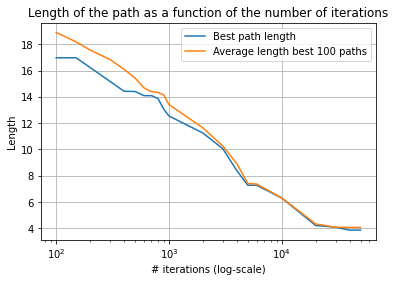

In [4]:
fig, (ax4) = plt.subplots(1, 1, figsize=(6, 4))
f4=open("Circ-costs.txt", "r")
iterations, circ_costs, circ_costs_av=np.loadtxt("Circ-costs.txt", unpack=True,usecols=(0, 1, 2), delimiter=' ')
ax4.plot(iterations, circ_costs, label='Best path length')
ax4.plot(iterations, circ_costs_av, label='Average length best 100 paths')
ax4.set_xscale('log')
ax4.grid(True)
ax4.set_xlabel("# iterations (log-scale)")
ax4.set_ylabel("Length")
ax4.legend()
ax4.set_title("Length of the path as a function of the number of iterations")



## Square

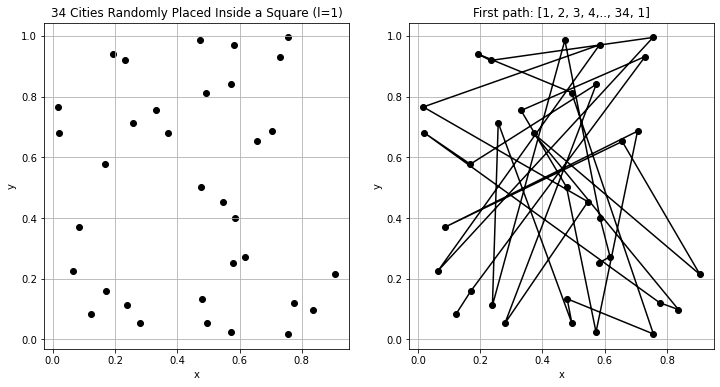

In [5]:
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(12, 6))

f5=open("Squarex.txt", "r")
f6=open("Squarey.txt", "r")

x_s = np.loadtxt("Squarex.txt")
y_s = np.loadtxt("Squarey.txt")
ax5.scatter(x_s, y_s, color='Black')
ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.set_title("34 Cities Randomly Placed Inside a Square (l=1)")

ax6.plot(x_s, y_s, '-ok',color='Black')
ax6.set_xlabel("x")
ax6.set_ylabel("y")
ax6.set_title("First path: [1, 2, 3, 4,.., 34, 1]")

ax5.grid(True)
ax6.grid(True)

Here the best path obtained after **25000** iterations of the algorithm. As expected, the path looks tidy and ordered:

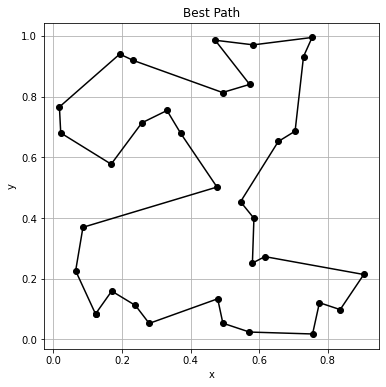

In [6]:
fig, (ax7) = plt.subplots(1, 1, figsize=(6, 6))
f7=open("final-cord-sq.txt")

x_s, y_s = np.loadtxt("final-cord-sq.txt", unpack=True,usecols=(1, 2), delimiter=' ')
ax7.set_xlabel("x")
ax7.set_ylabel("y")
ax7.set_title("Best Path")
ax7.plot(x_s, y_s, '-ok', color='Black')
ax7.grid(True)

Text(0.5, 1.0, 'Length of the path as a function of the number of iterations')

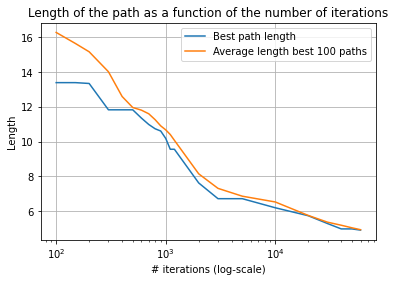

In [7]:
fig, (ax8) = plt.subplots(1, 1, figsize=(6, 4))

f8=open("Square-costs.txt", "r")

iterations, square_costs, square_costs_av=np.loadtxt("Square-costs.txt", unpack=True,usecols=(0, 1, 2), delimiter=' ')
ax8.plot(iterations, square_costs, label='Best path length')
ax8.plot(iterations, square_costs_av, label='Average length best 100 paths')
ax8.set_xscale('log')
ax8.grid(True)
ax8.set_xlabel("# iterations (log-scale)")
ax8.set_ylabel("Length")
ax8.legend()
ax8.set_title("Length of the path as a function of the number of iterations")

